In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix

In [2]:
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [3]:
coursera_asia_rank = pd.read_csv('Coursera skills/AsiaPacific_Ranking.csv')
coursera_asia_skill = pd.read_csv('Coursera skills/AsiaPacific_Skills.csv')
coursera_europe_rank = pd.read_csv('Coursera skills/Europe_Ranking.csv')
coursera_europe_skill = pd.read_csv('Coursera skills/Europe_Skills.csv')
coursera_lac_rank = pd.read_csv('Coursera skills/LatinAmericaAndtheCaribbean_Ranking.csv')
coursera_lac_skill = pd.read_csv('Coursera skills/LatinAmericaAndtheCaribbean_Skill.csv')
coursera_mena_rank = pd.read_csv('Coursera skills/MiddleEastAndNorthAfrica_Ranking.csv')
coursera_mena_skill = pd.read_csv('Coursera skills/MiddleEastAndNorthAfrica_Skills.csv')
coursera_na_rank = pd.read_csv('Coursera skills/NorthAmerica_Ranking.csv')
coursera_na_skill = pd.read_csv('Coursera skills/NorthAmerica_Skills.csv')
coursera_ssa_rank = pd.read_csv('Coursera skills/Sub-SaharanAfrica_Ranking.csv')
coursera_ssa_skill = pd.read_csv('Coursera skills/Sub-SaharanAfrica_Skills.csv')

In [4]:
frames1 = [coursera_asia_rank, coursera_europe_rank, coursera_lac_rank, coursera_mena_rank, coursera_na_rank, coursera_ssa_rank]
frames2 = [coursera_asia_skill, coursera_europe_skill, coursera_lac_skill, coursera_mena_skill, coursera_na_skill, coursera_ssa_skill]

In [5]:
coursera_df1_rank = pd.concat(frames1)
coursera_df2_skill = pd.concat(frames2)

In [6]:
print(coursera_df1_rank.head())
print('-' * 80)
print(coursera_df2_skill.head())

       Region Business Technology Data Science Overall Rank  \
0   Australia     0.31       0.61         0.74           44   
1  Bangladesh     0.59       0.38         0.38           64   
2      Bhutan     0.18       0.14         0.03          100   
3       China     0.85       0.21         0.81           39   
4   Hong Kong     0.86       0.51         0.92           23   

  Overall Rank Business Overall Rank Technology Overall Rank Data Science  \
0                    75                      44                        29   
1                    46                      67                        67   
2                    89                      93                       106   
3                    17                      85                        21   
4                    16                      54                        10   

  Unnamed: 0  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
--------------------------------------------------------------------

In [7]:
print(coursera_df1_rank.isnull().sum())
print('-' * 80)
print(coursera_df2_skill.isnull().sum())

Region                        17
Business                       2
Technology                     2
Data Science                   2
Overall Rank                   6
Overall Rank Business          6
Overall Rank Technology        6
Overall Rank Data Science      6
Unnamed: 0                   100
dtype: int64
--------------------------------------------------------------------------------
Region                          0
Accounting                      0
Communications                  0
Entrepreneurship                0
Finance                         0
Human Resources                 0
Leadership                      0
Marketing                       0
Sales                           0
Strategy &\nOperations          0
Cloud Computing                 0
Computer Networking             0
Computer Programming            0
Databases                       0
Mobile Development              0
Operating Systems               0
Security Engineering            0
Software Engineering           

In [8]:
print(coursera_df1_rank.dtypes)
print('-' * 80)
print(coursera_df2_skill.dtypes)

Region                       object
Business                     object
Technology                   object
Data Science                 object
Overall Rank                 object
Overall Rank Business        object
Overall Rank Technology      object
Overall Rank Data Science    object
Unnamed: 0                   object
dtype: object
--------------------------------------------------------------------------------
Region                           object
Accounting                      float64
Communications                  float64
Entrepreneurship                float64
Finance                         float64
Human Resources                 float64
Leadership                      float64
Marketing                       float64
Sales                           float64
Strategy &\nOperations          float64
Cloud Computing                 float64
Computer Networking             float64
Computer Programming            float64
Databases                       float64
Mobile Development   

In [9]:
coursera_df_rank = coursera_df1_rank
coursera_skills = coursera_df2_skill

In [10]:
coursera_skills.columns

Index(['Region', 'Accounting', 'Communications', 'Entrepreneurship', 'Finance',
       'Human Resources', 'Leadership', 'Marketing', 'Sales',
       'Strategy &\nOperations', 'Cloud Computing', 'Computer Networking',
       'Computer Programming', 'Databases', 'Mobile Development',
       'Operating Systems', 'Security Engineering', 'Software Engineering',
       'Theoretical Computer Science', 'Web Development', 'Data Analysis',
       'Data Management', 'Data Visualization', 'Machine Learning',
       'Mathematics', 'Probability & Statistics', 'Statistical Programming'],
      dtype='object')

In [11]:
cols_to_calc = ['Accounting', 'Communications', 'Entrepreneurship', 'Finance',
                'Human Resources', 'Leadership', 'Marketing', 'Sales',
                'Strategy &\nOperations', 'Cloud Computing', 'Computer Networking',
                'Computer Programming', 'Databases', 'Mobile Development',
                'Operating Systems', 'Security Engineering', 'Software Engineering',
                'Theoretical Computer Science', 'Web Development', 'Data Analysis',
                'Data Management', 'Data Visualization', 'Machine Learning',
                'Mathematics', 'Probability & Statistics', 'Statistical Programming']

In [12]:
coursera_skills['Total_Avg_Score'] = coursera_skills[cols_to_calc].sum(axis=1)
coursera_skills

,Region,Accounting,Communications,Entrepreneurship,Finance,Human Resources,Leadership,Marketing,Sales,Strategy &\nOperations,...,Theoretical Computer Science,Web Development,Data Analysis,Data Management,Data Visualization,Machine Learning,Mathematics,Probability & Statistics,Statistical Programming,Total_Avg_Score
0,Australia,0.40,0.22,0.13,0.65,0.19,0.35,0.50,0.54,0.42,...,0.58,0.35,0.83,0.97,0.88,0.61,0.67,0.60,0.46,14.08
1,Bangladesh,0.34,0.76,0.95,0.51,0.40,0.69,0.41,0.64,0.68,...,0.29,0.40,0.60,0.38,0.65,0.35,0.41,0.46,0.23,12.47
2,Bhutan,0.29,0.10,0.38,0.63,0.04,0.24,0.21,0.71,0.04,...,0.68,0.06,0.08,0.02,0.24,0.03,0.07,0.10,0.30,6.32
3,China,0.80,0.85,0.76,0.88,0.93,0.71,0.67,0.52,0.38,...,0.96,0.14,0.35,0.86,0.72,0.86,0.95,0.92,0.41,15.39
4,Hong Kong,0.67,0.70,0.75,0.96,0.85,0.73,0.80,0.73,0.59,...,0.92,0.65,0.58,0.71,0.96,0.88,0.98,0.87,0.70,17.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Rwanda,0.71,0.51,0.73,0.22,0.86,0.93,0.40,0.56,1.00,...,0.18,0.22,0.38,0.33,0.83,0.43,0.23,0.47,0.53,12.25
7,Sierra Leone,0.99,0.49,0.46,0.27,0.70,0.62,0.07,0.30,0.32,...,0.02,0.02,0.70,0.47,0.28,0.04,0.01,0.46,0.02,7.03
8,Somalia,0.07,0.08,0.01,0.01,0.02,0.08,0.01,0.14,0.30,...,0.01,0.27,0.05,0.01,0.99,0.01,0.02,0.04,0.04,2.96
9,South Africa,0.72,0.37,0.57,0.54,0.24,0.67,0.75,0.89,0.71,...,0.63,0.77,0.37,0.63,0.94,0.51,0.54,0.39,0.26,14.78


In [13]:
coursera_ranks = coursera_df_rank.dropna(axis=0, subset=['Region'])
coursera_ranks = coursera_df_rank.dropna(axis=0, subset=['Business'])
coursera_ranks = coursera_df_rank.dropna(axis=0, subset=['Technology'])
coursera_ranks = coursera_df_rank.dropna(axis=0, subset=['Data Science'])
coursera_ranks = coursera_df_rank.dropna(axis=0, subset=['Overall Rank'])
coursera_ranks = coursera_df_rank.dropna(axis=0, subset=['Overall Rank Business'])
coursera_ranks = coursera_df_rank.dropna(axis=0, subset=['Overall Rank Technology'])
coursera_ranks = coursera_df_rank.dropna(axis=0, subset=['Overall Rank Data Science'])

In [14]:
coursera_ranks_new = coursera_ranks.drop(['Unnamed: 0'], axis=1)

In [15]:
coursera_ranks_new = coursera_ranks_new.dropna(axis=0, subset=['Region'])

In [16]:
coursera_ranks_new

,Region,Business,Technology,Data Science,Overall Rank,Overall Rank Business,Overall Rank Technology,Overall Rank Data Science
0,Australia,0.31,0.61,0.74,44,75,44,29
1,Bangladesh,0.59,0.38,0.38,64,46,67,67
2,Bhutan,0.18,0.14,0.03,100,89,93,106
3,China,0.85,0.21,0.81,39,17,85,21
4,Hong Kong,0.86,0.51,0.92,23,16,54,10
...,...,...,...,...,...,...,...,...
6,Rwanda,0.78,0.2,0.4,66,25,87,64
7,Sierra Leone,0.41,0.02,0.04,105,65,107,104
8,Somalia,0.01,0.01,0.01,108,108,108,108
9,South Africa,0.66,0.58,0.51,42,38,46,52


In [17]:
coursera_ranks_new.dtypes

Region                       object
Business                     object
Technology                   object
Data Science                 object
Overall Rank                 object
Overall Rank Business        object
Overall Rank Technology      object
Overall Rank Data Science    object
dtype: object

In [18]:
coursera_ranks_new.isnull().sum()

Region                       0
Business                     0
Technology                   0
Data Science                 0
Overall Rank                 0
Overall Rank Business        0
Overall Rank Technology      0
Overall Rank Data Science    0
dtype: int64

In [19]:
coursera_ranks_new['Business'] = coursera_ranks_new['Business'].astype(float)
coursera_ranks_new['Technology'] = coursera_ranks_new['Technology'].astype(float)
coursera_ranks_new['Data Science'] = coursera_ranks_new['Data Science'].astype(float)
coursera_ranks_new['Overall Rank'] = coursera_ranks_new['Overall Rank'].astype(float)
coursera_ranks_new['Overall Rank Technology'] = coursera_ranks_new['Overall Rank Technology'].astype(float)
coursera_ranks_new['Overall Rank Data Science'] = coursera_ranks_new['Overall Rank Data Science'].astype(float)
coursera_ranks_new['Overall Rank Business'] = coursera_ranks_new['Overall Rank Business'].astype(float)

In [20]:
coursera_ranks_new.dtypes

Region                        object
Business                     float64
Technology                   float64
Data Science                 float64
Overall Rank                 float64
Overall Rank Business        float64
Overall Rank Technology      float64
Overall Rank Data Science    float64
dtype: object

In [21]:
coursera_ranks_new.head()

,Region,Business,Technology,Data Science,Overall Rank,Overall Rank Business,Overall Rank Technology,Overall Rank Data Science
0,Australia,0.31,0.61,0.74,44.0,75.0,44.0,29.0
1,Bangladesh,0.59,0.38,0.38,64.0,46.0,67.0,67.0
2,Bhutan,0.18,0.14,0.03,100.0,89.0,93.0,106.0
3,China,0.85,0.21,0.81,39.0,17.0,85.0,21.0
4,Hong Kong,0.86,0.51,0.92,23.0,16.0,54.0,10.0


In [22]:
coursera_ranks_new.columns

Index(['Region', 'Business', 'Technology', 'Data Science', 'Overall Rank',
       'Overall Rank Business', 'Overall Rank Technology',
       'Overall Rank Data Science'],
      dtype='object')

In [23]:
coursera_skills

,Region,Accounting,Communications,Entrepreneurship,Finance,Human Resources,Leadership,Marketing,Sales,Strategy &\nOperations,...,Theoretical Computer Science,Web Development,Data Analysis,Data Management,Data Visualization,Machine Learning,Mathematics,Probability & Statistics,Statistical Programming,Total_Avg_Score
0,Australia,0.40,0.22,0.13,0.65,0.19,0.35,0.50,0.54,0.42,...,0.58,0.35,0.83,0.97,0.88,0.61,0.67,0.60,0.46,14.08
1,Bangladesh,0.34,0.76,0.95,0.51,0.40,0.69,0.41,0.64,0.68,...,0.29,0.40,0.60,0.38,0.65,0.35,0.41,0.46,0.23,12.47
2,Bhutan,0.29,0.10,0.38,0.63,0.04,0.24,0.21,0.71,0.04,...,0.68,0.06,0.08,0.02,0.24,0.03,0.07,0.10,0.30,6.32
3,China,0.80,0.85,0.76,0.88,0.93,0.71,0.67,0.52,0.38,...,0.96,0.14,0.35,0.86,0.72,0.86,0.95,0.92,0.41,15.39
4,Hong Kong,0.67,0.70,0.75,0.96,0.85,0.73,0.80,0.73,0.59,...,0.92,0.65,0.58,0.71,0.96,0.88,0.98,0.87,0.70,17.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Rwanda,0.71,0.51,0.73,0.22,0.86,0.93,0.40,0.56,1.00,...,0.18,0.22,0.38,0.33,0.83,0.43,0.23,0.47,0.53,12.25
7,Sierra Leone,0.99,0.49,0.46,0.27,0.70,0.62,0.07,0.30,0.32,...,0.02,0.02,0.70,0.47,0.28,0.04,0.01,0.46,0.02,7.03
8,Somalia,0.07,0.08,0.01,0.01,0.02,0.08,0.01,0.14,0.30,...,0.01,0.27,0.05,0.01,0.99,0.01,0.02,0.04,0.04,2.96
9,South Africa,0.72,0.37,0.57,0.54,0.24,0.67,0.75,0.89,0.71,...,0.63,0.77,0.37,0.63,0.94,0.51,0.54,0.39,0.26,14.78


## ....................................................................................................................................

## ....................................................................................................................................

In [24]:
coursera_skills.describe()

,Accounting,Communications,Entrepreneurship,Finance,Human Resources,Leadership,Marketing,Sales,Strategy &\nOperations,Cloud Computing,...,Theoretical Computer Science,Web Development,Data Analysis,Data Management,Data Visualization,Machine Learning,Mathematics,Probability & Statistics,Statistical Programming,Total_Avg_Score
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,...,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,0.504643,0.504643,0.504643,0.504643,0.504643,0.504643,0.504643,0.504643,0.504643,0.504643,...,0.504643,0.504643,0.504643,0.504643,0.504643,0.504643,0.504643,0.504643,0.504643,13.120804
std,0.289889,0.289889,0.289889,0.289889,0.289889,0.289889,0.289889,0.289889,0.289889,0.289889,...,0.289889,0.289889,0.289889,0.289889,0.289889,0.289889,0.289889,0.289889,0.289889,4.042584
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,2.960000
25%,0.257500,0.257500,0.257500,0.257500,0.257500,0.257500,0.257500,0.257500,0.257500,0.257500,...,0.257500,0.257500,0.257500,0.257500,0.257500,0.257500,0.257500,0.257500,0.257500,10.600000
50%,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,...,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,13.090000
75%,0.752500,0.752500,0.752500,0.752500,0.752500,0.752500,0.752500,0.752500,0.752500,0.752500,...,0.752500,0.752500,0.752500,0.752500,0.752500,0.752500,0.752500,0.752500,0.752500,16.100000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.960000


In [25]:
coursera_ranks_new.describe()

,Business,Technology,Data Science,Overall Rank,Overall Rank Business,Overall Rank Technology,Overall Rank Data Science
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.494894,0.516809,0.524149,52.946809,55.414894,52.797872,51.606383
std,0.290097,0.300470,0.294806,32.305786,31.246646,32.329480,31.644945
min,0.010000,0.010000,0.010000,1.000000,1.000000,1.000000,1.000000
25%,0.222500,0.222500,0.282500,24.250000,30.250000,24.250000,25.250000
50%,0.505000,0.545000,0.535000,50.500000,54.500000,50.000000,49.000000
75%,0.727500,0.787500,0.777500,80.750000,83.750000,83.750000,77.750000
max,1.000000,1.000000,1.000000,108.000000,108.000000,108.000000,108.000000


# ............................................................................................................

In [26]:
skills_corr = coursera_skills.corr()
ranks_corr = coursera_ranks_new.corr()

<AxesSubplot:>

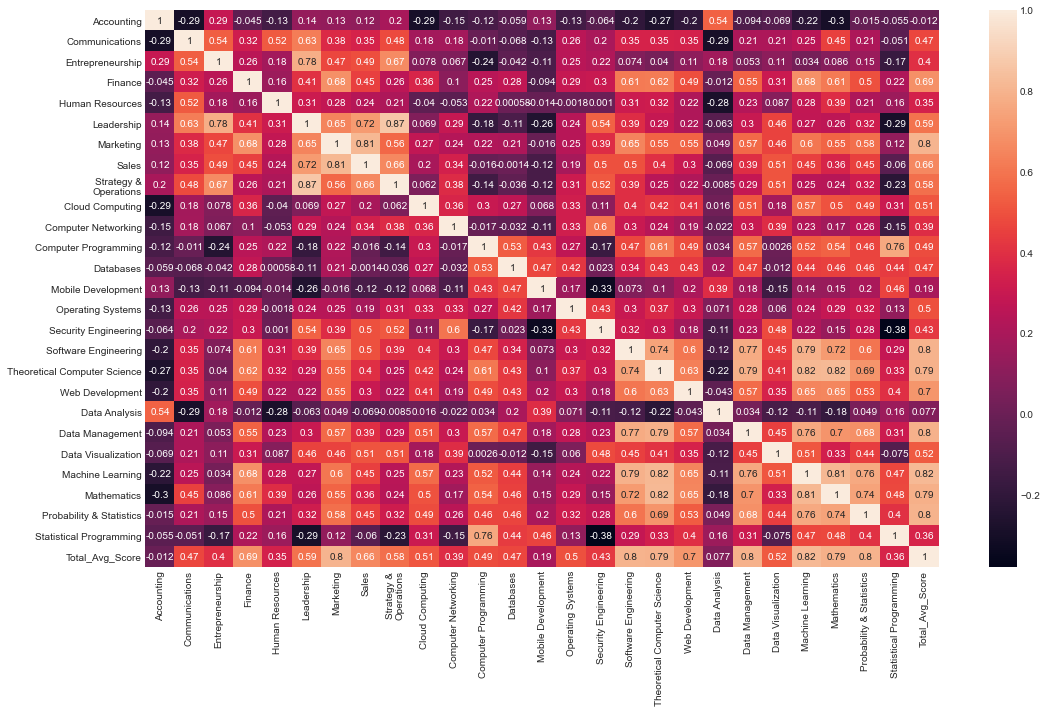

In [27]:
plt.figure(figsize=(16,10))
sns.heatmap(data=skills_corr, annot=True)

<AxesSubplot:>

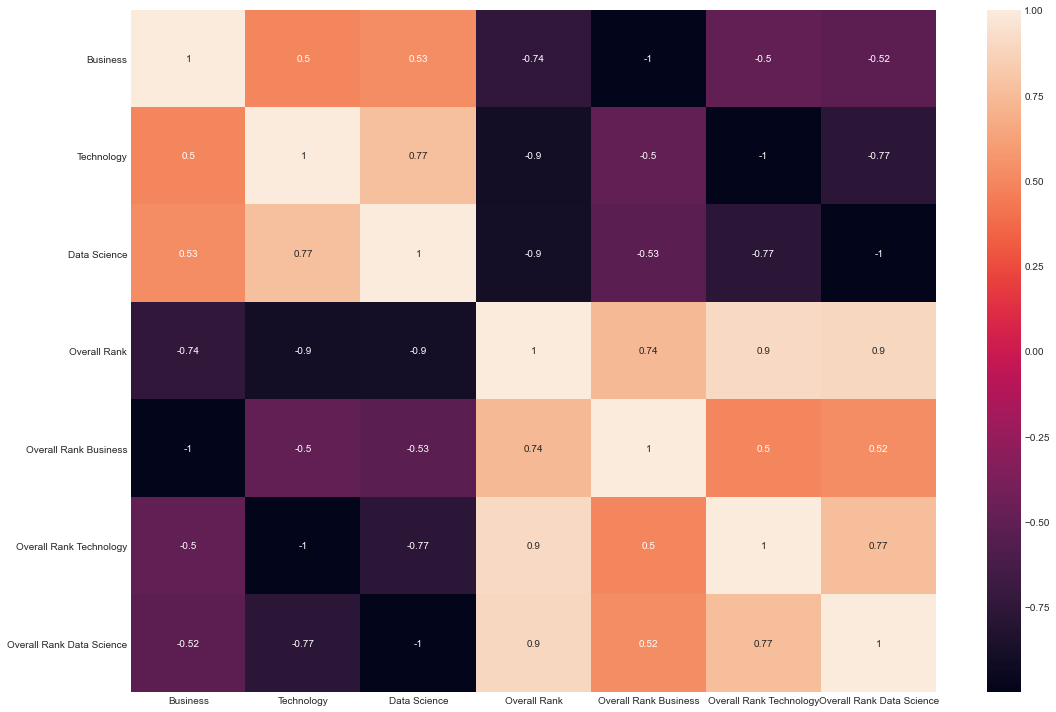

In [28]:
plt.figure(figsize=(16,10))
sns.heatmap(data=ranks_corr, annot=True)

In [29]:
coursera_skills_df = coursera_skills.drop(['Region'], axis=1)

In [30]:
coursera_skills_df.columns

Index(['Accounting', 'Communications', 'Entrepreneurship', 'Finance',
       'Human Resources', 'Leadership', 'Marketing', 'Sales',
       'Strategy &\nOperations', 'Cloud Computing', 'Computer Networking',
       'Computer Programming', 'Databases', 'Mobile Development',
       'Operating Systems', 'Security Engineering', 'Software Engineering',
       'Theoretical Computer Science', 'Web Development', 'Data Analysis',
       'Data Management', 'Data Visualization', 'Machine Learning',
       'Mathematics', 'Probability & Statistics', 'Statistical Programming',
       'Total_Avg_Score'],
      dtype='object')

In [31]:
kmeans1 = KMeans(n_clusters=6, random_state=0).fit(coursera_skills_df)
centroid = kmeans1.cluster_centers_
print(centroid)

[[ 0.46961538  0.55576923  0.455       0.56192308  0.59615385  0.53269231
   0.52807692  0.50076923  0.51730769  0.53692308  0.55384615  0.57153846
   0.62692308  0.47115385  0.58230769  0.61346154  0.65        0.625
   0.56692308  0.42807692  0.63769231  0.58076923  0.59576923  0.64346154
   0.56846154  0.48538462 14.455     ]
 [ 0.48733333  0.22733333  0.23466667  0.20533333  0.30133333  0.15866667
   0.11733333  0.15533333  0.13866667  0.196       0.24933333  0.282
   0.27        0.47133333  0.20266667  0.244       0.1         0.152
   0.22066667  0.528       0.12266667  0.27133333  0.13066667  0.14333333
   0.184       0.38533333  6.17933333]
 [ 0.50529412  0.60764706  0.56411765  0.66294118  0.62235294  0.63235294
   0.76117647  0.68058824  0.63058824  0.65294118  0.67764706  0.72294118
   0.64941176  0.63470588  0.55647059  0.56176471  0.72588235  0.76529412
   0.74941176  0.53117647  0.78117647  0.63705882  0.72235294  0.73294118
   0.75705882  0.62705882 17.15235294]
 [ 0.50428

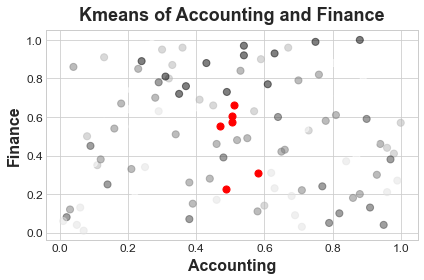

In [32]:
plt.scatter(coursera_skills_df['Accounting'], coursera_skills['Finance'], c= kmeans1.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroid[:, 0], centroid[:, 1], c='red', s=50)
plt.title('Kmeans of Accounting and Finance', size=18)
plt.xlabel('Accounting', size=16)
plt.ylabel('Finance', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

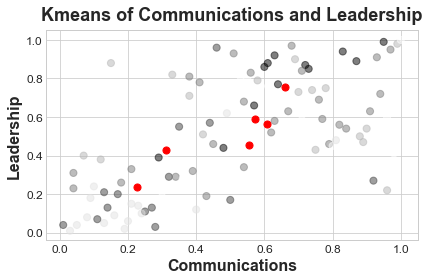

In [33]:
plt.scatter(coursera_skills_df['Communications'], coursera_skills['Leadership'], c= kmeans1.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroid[:, 1], centroid[:, 2], c='red', s=50)
plt.title('Kmeans of Communications and Leadership', size=18)
plt.xlabel('Communications', size=16)
plt.ylabel('Leadership', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

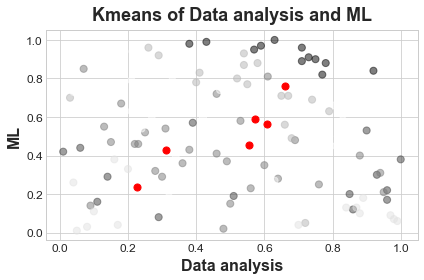

In [34]:
plt.scatter(coursera_skills_df['Data Analysis'], coursera_skills['Machine Learning'], c= kmeans1.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroid[:, 1], centroid[:, 2], c='red', s=50)
plt.title('Kmeans of Data analysis and ML', size=18)
plt.xlabel('Data analysis', size=16)
plt.ylabel('ML', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

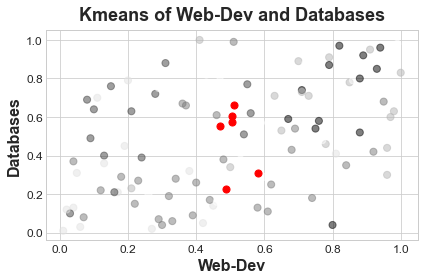

In [35]:
plt.scatter(coursera_skills_df['Web Development'], coursera_skills['Databases'], c= kmeans1.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroid[:, 0], centroid[:, 1], c='red', s=50)
plt.title('Kmeans of Web-Dev and Databases', size=18)
plt.xlabel('Web-Dev', size=16)
plt.ylabel('Databases', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

# ...........................................................................................................

In [36]:
coursera_skills.columns

Index(['Region', 'Accounting', 'Communications', 'Entrepreneurship', 'Finance',
       'Human Resources', 'Leadership', 'Marketing', 'Sales',
       'Strategy &\nOperations', 'Cloud Computing', 'Computer Networking',
       'Computer Programming', 'Databases', 'Mobile Development',
       'Operating Systems', 'Security Engineering', 'Software Engineering',
       'Theoretical Computer Science', 'Web Development', 'Data Analysis',
       'Data Management', 'Data Visualization', 'Machine Learning',
       'Mathematics', 'Probability & Statistics', 'Statistical Programming',
       'Total_Avg_Score'],
      dtype='object')

In [37]:
coursera_ranks_new.head()

,Region,Business,Technology,Data Science,Overall Rank,Overall Rank Business,Overall Rank Technology,Overall Rank Data Science
0,Australia,0.31,0.61,0.74,44.0,75.0,44.0,29.0
1,Bangladesh,0.59,0.38,0.38,64.0,46.0,67.0,67.0
2,Bhutan,0.18,0.14,0.03,100.0,89.0,93.0,106.0
3,China,0.85,0.21,0.81,39.0,17.0,85.0,21.0
4,Hong Kong,0.86,0.51,0.92,23.0,16.0,54.0,10.0


## Parameters to be set:

### 1. Financial = Accounting + Finance + Mathematics
### 2. Leadership = Communications + Entrepreneurship + Human Resources + Leadership
### 3. Promotion = Marketing + Sales + Strategy and Operations
### 4. Data Science = Data Analysis + Data Management + Data Visualization + Machine Learning + Mathematics + Probability and Statistics + Statistical Programming
### 5. Developer = Web Development + Data Management + Databases + Mobile Development
### 6. Computeristic = Cloud Computing + Computer Networking + Computer Programming + Databases + Data Management
### 7. Engineer = Theoritical Computer Science + Operating Systems + Security Engineering + Software Engineering + Cloud Computing + Computer Programming + Computer Networking
### 8. Financial analyst = Accounting + Finance + Data analysis + Data Visualization + Communications + Mathematics + Probability and Statistics

In [38]:
coursera_skills_grouped = pd.DataFrame(coursera_skills['Region'])

In [39]:
coursera_skills_grouped['Financial'] = coursera_skills['Accounting'] + coursera_skills['Finance'] + coursera_skills['Mathematics']

coursera_skills_grouped['Leadership_quality'] = coursera_skills['Communications'] + coursera_skills['Leadership']
+ coursera_skills['Entrepreneurship'] + coursera_skills['Human Resources']

coursera_skills_grouped['Promotion'] = coursera_skills['Marketing'] + coursera_skills['Sales'] + coursera_skills['Strategy &\nOperations']

coursera_skills_grouped['Data Science'] = coursera_skills['Data Analysis'] + coursera_skills['Data Management']
+ coursera_skills['Data Visualization'] + coursera_skills['Machine Learning'] + coursera_skills['Mathematics']
+ coursera_skills['Probability & Statistics'] + coursera_skills['Statistical Programming']

coursera_skills_grouped['Developer'] = coursera_skills['Web Development'] + coursera_skills['Data Management']
+ coursera_skills['Databases'] + coursera_skills['Mobile Development']

coursera_skills_grouped['Computer_expert'] = coursera_skills['Cloud Computing'] + coursera_skills['Computer Networking']
+ coursera_skills['Computer Programming'] + coursera_skills['Databases'] + coursera_skills['Data Management']

coursera_skills_grouped['Engineer'] = coursera_skills['Theoretical Computer Science'] + coursera_skills['Operating Systems']
+ coursera_skills['Security Engineering'] + coursera_skills['Software Engineering'] + coursera_skills['Cloud Computing']
+ coursera_skills['Computer Networking'] + coursera_skills['Computer Programming']

coursera_skills_grouped['Financial_analyst'] = coursera_skills['Accounting'] + coursera_skills['Finance']
+ coursera_skills['Mathematics'] + coursera_skills['Communications'] + coursera_skills['Data Analysis'] 
+ coursera_skills['Data Visualization'] + coursera_skills['Probability & Statistics']

0     1.48
1     1.11
2     0.34
3     1.64
4     1.83
      ... 
6     1.30
7     0.74
8     1.03
9     1.33
10    1.54
Length: 112, dtype: float64

In [40]:
coursera_skills_grouped

,Region,Financial,Leadership_quality,Promotion,Data Science,Developer,Computer_expert,Engineer,Financial_analyst
0,Australia,1.72,0.57,1.46,1.80,1.32,1.34,1.12,1.05
1,Bangladesh,1.26,1.45,1.73,0.98,0.78,1.81,0.63,0.85
2,Bhutan,0.99,0.34,0.96,0.10,0.08,0.56,0.96,0.92
3,China,2.63,1.56,1.57,1.21,1.00,0.26,1.01,1.68
4,Hong Kong,2.61,1.43,2.12,1.29,1.36,0.91,1.13,1.63
...,...,...,...,...,...,...,...,...,...
6,Rwanda,1.16,1.44,1.96,0.71,0.55,0.77,0.22,0.93
7,Sierra Leone,1.27,1.11,0.69,1.17,0.49,0.14,0.10,1.26
8,Somalia,0.10,0.16,0.45,0.06,0.28,0.51,0.02,0.08
9,South Africa,1.80,1.04,2.35,1.00,1.40,1.17,1.19,1.26


In [41]:
skills_region = coursera_skills_grouped.sort_values(by =['Financial', 'Leadership_quality',
                                                                 'Promotion', 'Data Science', 
                                                                 'Developer', 'Computer_expert',
                                                                 'Engineer', 'Financial_analyst'] , ascending = False)

In [42]:
skills_region.head(5)

,Region,Financial,Leadership_quality,Promotion,Data Science,Developer,Computer_expert,Engineer,Financial_analyst
3,China,2.63,1.56,1.57,1.21,1.00,0.26,1.01,1.68
31,Switzerland,2.61,1.77,2.90,1.58,1.62,0.62,1.79,1.74
4,Hong Kong,2.61,1.43,2.12,1.29,1.36,0.91,1.13,1.63
4,Belgium,2.48,1.49,2.46,1.56,1.74,1.22,1.59,1.56
1,Austria,2.39,1.76,2.69,1.37,1.52,1.11,1.68,1.51


In [43]:
skills_region.tail(5)

,Region,Financial,Leadership_quality,Promotion,Data Science,Developer,Computer_expert,Engineer,Financial_analyst
21,Uzbekistan,0.47,0.18,0.10,0.22,0.22,0.39,0.23,0.19
0,Algeria,0.43,0.52,0.43,0.39,0.64,1.14,0.61,0.07
9,Kyrgyzstan,0.39,0.67,1.27,0.22,0.45,0.59,0.96,0.10
2,Iraq,0.21,1.29,0.41,0.14,0.05,0.28,0.20,0.09
8,Somalia,0.10,0.16,0.45,0.06,0.28,0.51,0.02,0.08


In [44]:
coursera_ranks_new

,Region,Business,Technology,Data Science,Overall Rank,Overall Rank Business,Overall Rank Technology,Overall Rank Data Science
0,Australia,0.31,0.61,0.74,44.0,75.0,44.0,29.0
1,Bangladesh,0.59,0.38,0.38,64.0,46.0,67.0,67.0
2,Bhutan,0.18,0.14,0.03,100.0,89.0,93.0,106.0
3,China,0.85,0.21,0.81,39.0,17.0,85.0,21.0
4,Hong Kong,0.86,0.51,0.92,23.0,16.0,54.0,10.0
...,...,...,...,...,...,...,...,...
6,Rwanda,0.78,0.20,0.40,66.0,25.0,87.0,64.0
7,Sierra Leone,0.41,0.02,0.04,105.0,65.0,107.0,104.0
8,Somalia,0.01,0.01,0.01,108.0,108.0,108.0,108.0
9,South Africa,0.66,0.58,0.51,42.0,38.0,46.0,52.0


In [45]:
ranks_region = coursera_ranks_new.sort_values(by = ['Business', 'Technology', 'Data Science', 
                                                    'Overall Rank', 'Overall Rank Business', 
                                                    'Overall Rank Technology', 'Overall Rank Data Science'],
                                              ascending=False)

In [46]:
ranks_region.head(5)

,Region,Business,Technology,Data Science,Overall Rank,Overall Rank Business,Overall Rank Technology,Overall Rank Data Science
20,Luxembourg,1.00,0.62,0.85,2.0,1.0,43.0,17.0
31,Switzerland,0.98,0.84,0.96,1.0,3.0,18.0,6.0
22,Norway,0.96,0.63,0.88,11.0,4.0,42.0,13.0
10,Uganda,0.96,0.55,0.31,37.0,5.0,49.0,74.0
1,Austria,0.95,0.88,0.95,3.0,6.0,14.0,7.0


In [47]:
ranks_region.tail(5)

,Region,Business,Technology,Data Science,Overall Rank,Overall Rank Business,Overall Rank Technology,Overall Rank Data Science
15,Panama,0.05,0.13,0.07,101.0,103.0,94.0,101.0
21,Uzbekistan,0.04,0.06,0.09,104.0,105.0,102.0,99.0
13,Mexico,0.03,0.10,0.26,102.0,106.0,98.0,80.0
16,Paraguay,0.02,0.07,0.11,106.0,107.0,101.0,97.0
8,Somalia,0.01,0.01,0.01,108.0,108.0,108.0,108.0


In [48]:
skills_region.describe()

,Financial,Leadership_quality,Promotion,Data Science,Developer,Computer_expert,Engineer,Financial_analyst
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,1.513929,1.009286,1.513929,1.009286,1.009286,1.009286,1.009286,1.009286
std,0.545883,0.523124,0.770650,0.416936,0.513874,0.478143,0.479945,0.400656
min,0.100000,0.040000,0.060000,0.060000,0.050000,0.120000,0.020000,0.070000
25%,1.152500,0.517500,0.930000,0.710000,0.577500,0.627500,0.607500,0.740000
50%,1.520000,1.125000,1.540000,1.010000,1.045000,1.030000,1.090000,1.045000
75%,1.942500,1.412500,2.135000,1.350000,1.410000,1.360000,1.372500,1.312500
max,2.630000,2.000000,2.920000,1.800000,1.950000,1.950000,1.860000,1.880000


In [49]:
ranks_region.describe()

,Business,Technology,Data Science,Overall Rank,Overall Rank Business,Overall Rank Technology,Overall Rank Data Science
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.494894,0.516809,0.524149,52.946809,55.414894,52.797872,51.606383
std,0.290097,0.300470,0.294806,32.305786,31.246646,32.329480,31.644945
min,0.010000,0.010000,0.010000,1.000000,1.000000,1.000000,1.000000
25%,0.222500,0.222500,0.282500,24.250000,30.250000,24.250000,25.250000
50%,0.505000,0.545000,0.535000,50.500000,54.500000,50.000000,49.000000
75%,0.727500,0.787500,0.777500,80.750000,83.750000,83.750000,77.750000
max,1.000000,1.000000,1.000000,108.000000,108.000000,108.000000,108.000000


In [50]:
skills_region.columns

Index(['Region', 'Financial', 'Leadership_quality', 'Promotion',
       'Data Science', 'Developer', 'Computer_expert', 'Engineer',
       'Financial_analyst'],
      dtype='object')

In [51]:
cols = ['Financial', 'Leadership_quality', 'Promotion',
       'Data Science', 'Developer', 'Computer_expert', 'Engineer',
       'Financial_analyst']
skills_region['Total_course_score'] = skills_region[cols].sum(axis=1)

skills_region['Dev_score'] = skills_region['Developer'] + skills_region['Computer_expert'] + skills_region['Data Science']
+ skills_region['Engineer']

skills_region['Finance_score'] = skills_region['Financial'] + skills_region['Financial_analyst']

skills_region['Business_score'] = skills_region['Promotion'] + skills_region['Leadership_quality'] + skills_region['Financial']

In [52]:
skills_region.head()

,Region,Financial,Leadership_quality,Promotion,Data Science,Developer,Computer_expert,Engineer,Financial_analyst,Total_course_score,Dev_score,Finance_score,Business_score
3,China,2.63,1.56,1.57,1.21,1.00,0.26,1.01,1.68,10.92,2.47,4.31,5.76
31,Switzerland,2.61,1.77,2.90,1.58,1.62,0.62,1.79,1.74,14.63,3.82,4.35,7.28
4,Hong Kong,2.61,1.43,2.12,1.29,1.36,0.91,1.13,1.63,12.48,3.56,4.24,6.16
4,Belgium,2.48,1.49,2.46,1.56,1.74,1.22,1.59,1.56,14.10,4.52,4.04,6.43
1,Austria,2.39,1.76,2.69,1.37,1.52,1.11,1.68,1.51,14.03,4.00,3.90,6.84


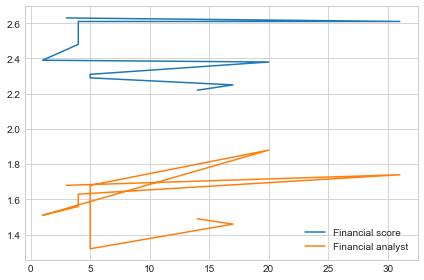

In [65]:
skills_region['Financial'].head(10).plot(label='Financial score', figsize=(6,4))
skills_region['Financial_analyst'].head(10).plot(label='Financial analyst')
plt.legend()
plt.show()

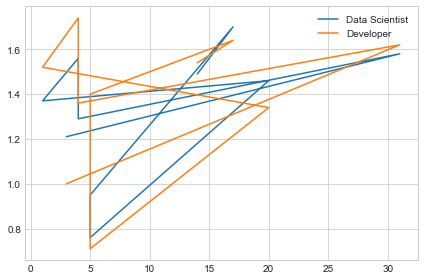

In [66]:
skills_region['Data Science'].head(10).plot(label='Data Scientist')
skills_region['Developer'].head(10).plot(label='Developer')
plt.legend()
plt.show()

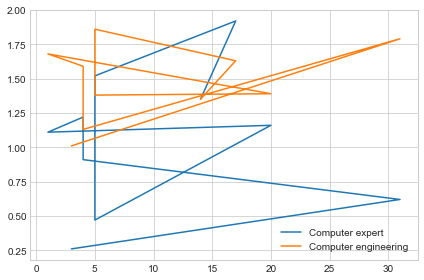

In [67]:
skills_region['Computer_expert'].head(10).plot(label='Computer expert')
skills_region['Engineer'].head(10).plot(label='Computer engineering')
plt.legend()
plt.show()

In [77]:
scores1 = skills_region[['Financial', 'Leadership_quality', 'Financial_analyst', 'Promotion', 'Data Science',
                       'Developer', 'Engineer', 'Computer_expert']]

scores2 = skills_region[['Dev_score', 'Business_score', 'Finance_score']]

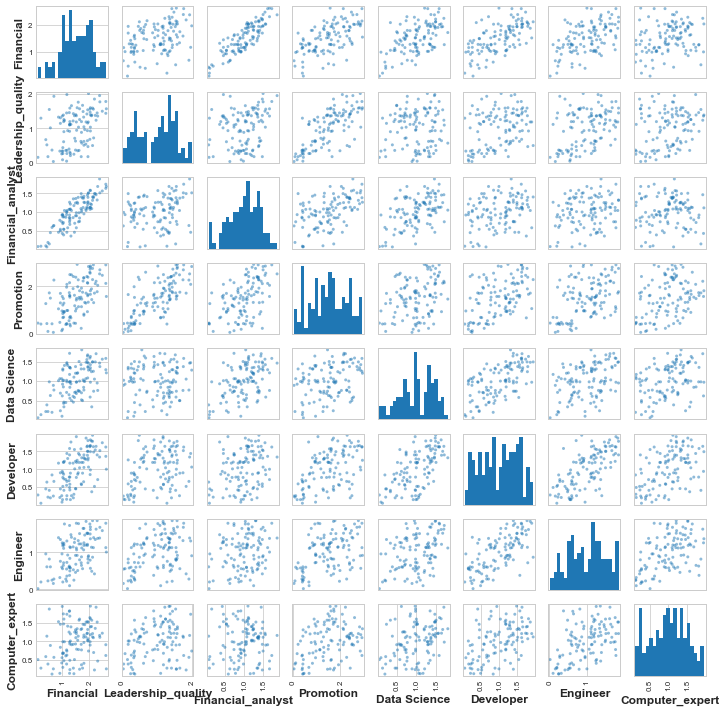

In [84]:
scatter_matrix(scores1, figsize=(10,10), hist_kwds={'bins':20})
plt.show()

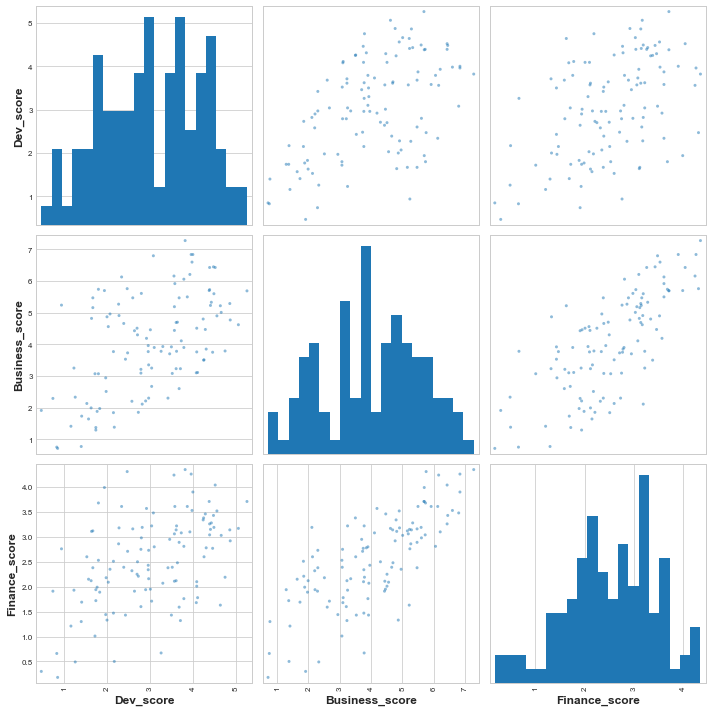

In [83]:
scatter_matrix(scores2, figsize=(10,10), hist_kwds={'bins':20})
plt.show()

In [81]:
ranks_region.head()

,Region,Business,Technology,Data Science,Overall Rank,Overall Rank Business,Overall Rank Technology,Overall Rank Data Science
20,Luxembourg,1.00,0.62,0.85,2.0,1.0,43.0,17.0
31,Switzerland,0.98,0.84,0.96,1.0,3.0,18.0,6.0
22,Norway,0.96,0.63,0.88,11.0,4.0,42.0,13.0
10,Uganda,0.96,0.55,0.31,37.0,5.0,49.0,74.0
1,Austria,0.95,0.88,0.95,3.0,6.0,14.0,7.0


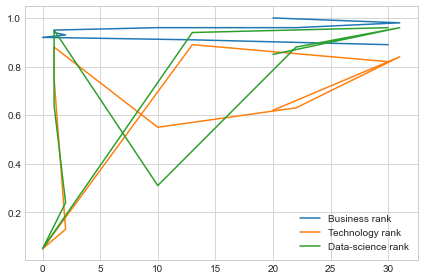

In [89]:
ranks_region['Business'].head(10).plot(label='Business rank', figsize=(6,4))
ranks_region['Technology'].head(10).plot(label='Technology rank')
ranks_region['Data Science'].head(10).plot(label='Data-science rank')
plt.legend()

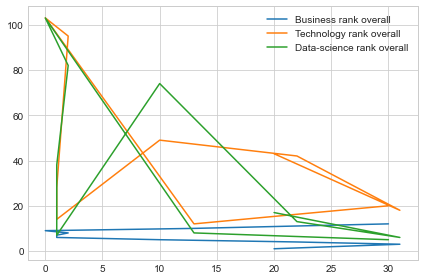

In [90]:
ranks_region['Overall Rank Business'].head(10).plot(label='Business rank overall', figsize=(6,4))
ranks_region['Overall Rank Technology'].head(10).plot(label='Technology rank overall')
ranks_region['Overall Rank Data Science'].head(10).plot(label='Data-science rank overall')
plt.legend()

In [91]:
scores3 = ranks_region[['Business', 'Technology', 'Data Science']]
scores4 = ranks_region[['Overall Rank Business', 'Overall Rank Technology', 'Overall Rank Data Science']]

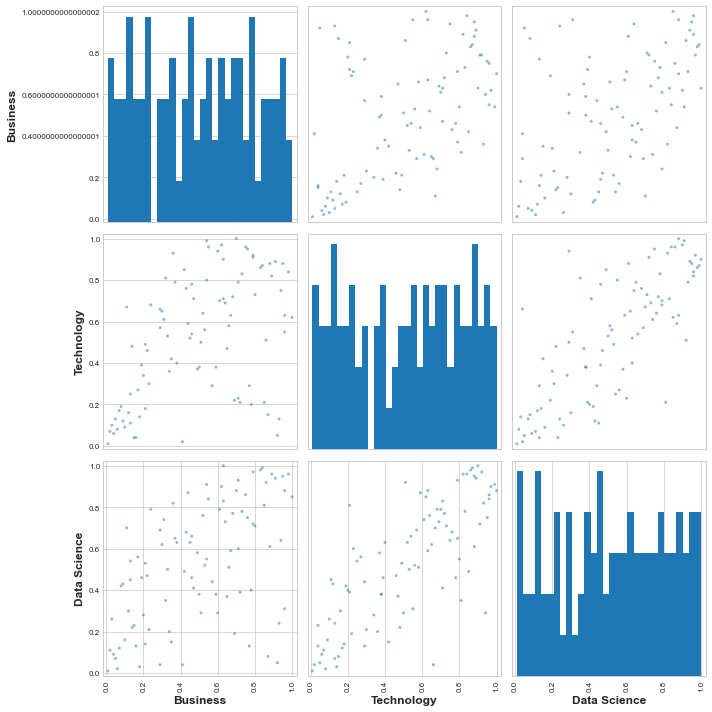

In [97]:
scatter_matrix(scores3, figsize=(10,10), hist_kwds={'bins':30})
plt.show()

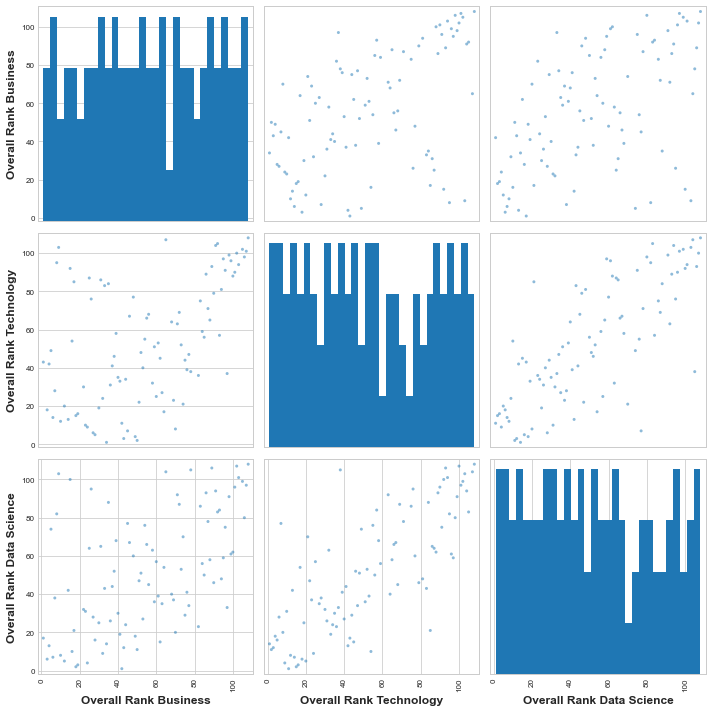

In [96]:
scatter_matrix(scores4, figsize=(10,10), hist_kwds={'bins':30})
plt.show()